In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
from tqdm import *
from scipy.integrate import nquad
from scipy.interpolate import interp1d
from scipy.special import erf
import matplotlib.pylab as pylab

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import matplotlib as mpl

from theory.units import *
from theory.spec_calc import PowerSpectra, PowerSpectraPopulations
from theory.astrometry_forecast import Parameter, AstrometryObservation, FisherForecast

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
from plot_params import params

pylab.rcParams.update(params)
plots_dir = "/Users/smsharma/Dropbox/Projects/LensPowerSpectra/LensPower/Draft/plots/"

save_figs = True

alpha_plot = 1.
lw_plot = 2.5

/Users/smsharma/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/smsharma/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/smsharma/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/smsharma/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


In [5]:
# Precompute some number for NFW and Burkert
pspec = PowerSpectra(precompute=['NFW', 'Burk'])

## Figure 4: differential power with mass and Galactocentric radius

In [6]:
pspecpop = PowerSpectraPopulations(l_max=2000)

pspecpop.set_radial_distribution(pspecpop.r2rho_V_ein_EAQ, R_min=1e-2*kpc, R_max=260*kpc)
pspecpop.set_mass_distribution(pspecpop.rho_M_SI, M_min=1e4*M_s, M_max=0.05*1.1e12*M_s, 
                               M_min_calib=1e8*M_s, M_max_calib=1e10*M_s, N_calib=150, alpha=-1.9)
pspecpop.set_subhalo_properties(pspecpop.c200_Moline)

In [ ]:
# Calculate spectra for fiducial CDM

pspecpop = PowerSpectraPopulations(l_max=2000)

pspecpop.set_radial_distribution(pspecpop.r2rho_V_ein_EAQ, R_min=1e-2*kpc, R_max=260*kpc)
pspecpop.set_mass_distribution(pspecpop.rho_M_SI, M_min=1e4*M_s, M_max=0.05*1.1e12*M_s, 
                               M_min_calib=1e8*M_s, M_max_calib=1e10*M_s, N_calib=150, alpha=-1.9)
pspecpop.set_subhalo_properties(pspecpop.c200_Moline)

C_l_mu = pspecpop.get_C_l_total_ary();

### Over masses

In [68]:
logM_min_plot = 6
logM_max_plot = 11.5

M_ary = np.logspace(logM_min_plot,logM_max_plot,100)*M_s

ell = 10
dlogC_l_dM_ary_10 = np.array([pspecpop.dC_l_dM_total(ell, M)/pspecpop.C_l_ary[ell] for M in tqdm_notebook(M_ary)])
ell = 30
dlogC_l_dM_ary_30 = np.array([pspecpop.dC_l_dM_total(ell, M)/pspecpop.C_l_ary[ell] for M in tqdm_notebook(M_ary)])
ell = 100
dlogC_l_dM_ary_100 = np.array([pspecpop.dC_l_dM_total(ell, M)/pspecpop.C_l_ary[ell] for M in tqdm_notebook(M_ary)])

/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


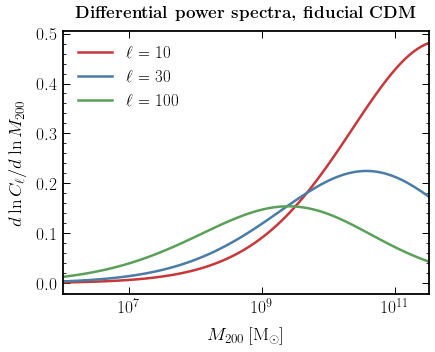

In [69]:
plt.plot(M_ary/M_s, (M_ary/M_s)*dlogC_l_dM_ary_10/(1/M_s),label="$\ell = 10$", alpha=alpha_plot, lw=lw_plot)
plt.plot(M_ary/M_s, (M_ary/M_s)*dlogC_l_dM_ary_30/(1/M_s),label="$\ell = 30$", alpha=alpha_plot, lw=lw_plot)
plt.plot(M_ary/M_s, (M_ary/M_s)*dlogC_l_dM_ary_100/(1/M_s),label="$\ell = 100$", alpha=alpha_plot, lw=lw_plot)

plt.xlabel("$M_{200}$\,[M$_\odot$]")
plt.ylabel("$d\ln C_\ell/d\ln M_{200}$")

plt.xscale("log")

plt.xlim(10**logM_min_plot, 10**logM_max_plot)

plt.legend(frameon=False)

plt.title('\\textbf{Differential power spectra, fiducial CDM}', y = 1.02, fontsize=17)


plt.tight_layout()
plt.savefig(plots_dir + "dlnCldlnM200.pdf")

### Over Galactocentric radii

In [70]:
R_min_plot = 1e-2
R_max_plot = 260

R_ary = np.linspace(R_min_plot, R_max_plot, 100)*kpc

ell = 10
dlogC_l_dR_ary_10 = np.array([pspecpop.dC_l_dR_total(ell, R)/pspecpop.C_l_ary[ell] for R in tqdm_notebook(R_ary)])
ell = 30
dlogC_l_dR_ary_30 = np.array([pspecpop.dC_l_dR_total(ell, R)/pspecpop.C_l_ary[ell] for R in tqdm_notebook(R_ary)])
ell = 100
dlogC_l_dR_ary_100 = np.array([pspecpop.dC_l_dR_total(ell, R)/pspecpop.C_l_ary[ell] for R in tqdm_notebook(R_ary)])

/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


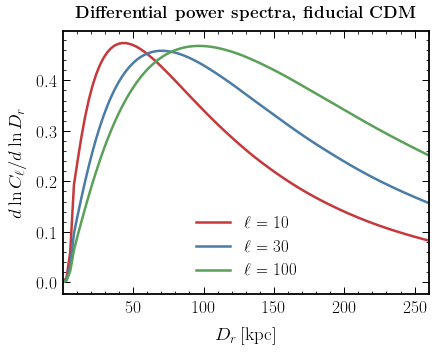

In [71]:
plt.plot(R_ary/kpc, (R_ary/kpc)*dlogC_l_dR_ary_10/(1/kpc),label="$\ell = 10$", alpha=alpha_plot, lw=lw_plot)
plt.plot(R_ary/kpc, (R_ary/kpc)*dlogC_l_dR_ary_30/(1/kpc),label="$\ell = 30$", alpha=alpha_plot, lw=lw_plot)
plt.plot(R_ary/kpc, (R_ary/kpc)*dlogC_l_dR_ary_100/(1/kpc),label="$\ell = 100$", alpha=alpha_plot, lw=lw_plot)

plt.xlabel("$D_r$\,[kpc]")
plt.ylabel("$d\ln C_\ell/d\ln D_r$")

plt.xlim(R_min_plot, R_max_plot)

plt.legend(frameon=False)

plt.title('\\textbf{Differential power spectra, fiducial CDM}', y = 1.02, fontsize=17)

plt.tight_layout()
# plt.savefig(plots_dir + "dlnCldlnR.pdf")

## Figure 3: Total signal and noise power spectrum

Different subhalo configurations.

In [72]:
# No tidal effects (subhalonumber density follows smooth MW halo)

pspecpop_notidal = PowerSpectraPopulations(l_max=2000)

pspecpop_notidal.set_radial_distribution(pspecpop.r2rho_V_NFW, R_min=1e-2*kpc, R_max=260*kpc)
pspecpop_notidal.set_mass_distribution(pspecpop.rho_M_SI, M_min=1e4*M_s, M_max=0.05*1.1e12*M_s, 
                               M_min_calib=1e8*M_s, M_max_calib=1e10*M_s, N_calib=150, alpha=-1.9)
pspecpop_notidal.set_subhalo_properties(pspecpop.c200_Moline)

C_l_mu_notidal = pspecpop_notidal.get_C_l_total_ary();

In [73]:
# Steeper subhalo mass function with alpha = -2

pspecpop_alpha2 = PowerSpectraPopulations(l_max=2000)

pspecpop_alpha2.set_radial_distribution(pspecpop.r2rho_V_ein_EAQ, R_min=1e-2*kpc, R_max=260*kpc)
pspecpop_alpha2.set_mass_distribution(pspecpop.rho_M_SI, M_min=1e4*M_s, M_max=0.05*1.1e12*M_s, 
                               M_min_calib=1e8*M_s, M_max_calib=1e10*M_s, N_calib=150, alpha=-2.0)
pspecpop_alpha2.set_subhalo_properties(pspecpop.c200_Moline)

C_l_mu_alpha2 = pspecpop_alpha2.get_C_l_total_ary();

In [74]:
# Different concentration-mass relation

pspecpop_SCP = PowerSpectraPopulations(l_max=2000)

pspecpop_SCP.set_radial_distribution(pspecpop.r2rho_V_ein_EAQ, R_min=1e-2*kpc, R_max=260*kpc)
pspecpop_SCP.set_mass_distribution(pspecpop.rho_M_SI, M_min=1e4*M_s, M_max=0.05*1.1e12*M_s, 
                               M_min_calib=1e8*M_s, M_max_calib=1e10*M_s, N_calib=150, alpha=-1.9)
pspecpop_SCP.set_subhalo_properties(pspecpop.c200_SCP)

C_l_mu_SCP = pspecpop_alpha2.get_C_l_total_ary();

In [75]:
# Another concentration-mass relation

pspecpop_Correa = PowerSpectraPopulations(l_max=2000)

pspecpop_Correa.set_radial_distribution(pspecpop.r2rho_V_ein_EAQ, R_min=1e-2*kpc, R_max=260*kpc)
pspecpop_Correa.set_mass_distribution(pspecpop.rho_M_SI, M_min=1e4*M_s, M_max=0.05*1.1e12*M_s, 
                               M_min_calib=1e8*M_s, M_max_calib=1e10*M_s, N_calib=150, alpha=-1.9)
pspecpop_Correa.set_subhalo_properties(pspecpop.c200_Correa)

C_l_mu_Correa = pspecpop_Correa.get_C_l_total_ary();

TypeError: c200_Correa() got an unexpected keyword argument 'xsub'

In [76]:
# Larger number of subhalos

pspecpop_ncalib300 = PowerSpectraPopulations(l_max=2000)

pspecpop_ncalib300.set_radial_distribution(pspecpop.r2rho_V_ein_EAQ, R_min=1e-2*kpc, R_max=260*kpc)
pspecpop_ncalib300.set_mass_distribution(pspecpop.rho_M_SI, M_min=1e4*M_s, M_max=0.05*1.1e12*M_s, 
                               M_min_calib=1e8*M_s, M_max_calib=1e10*M_s, N_calib=300, alpha=-1.9)
pspecpop_ncalib300.set_subhalo_properties(pspecpop.c200_Moline)

C_l_mu_ncalib300 = pspecpop_ncalib300.get_C_l_total_ary();

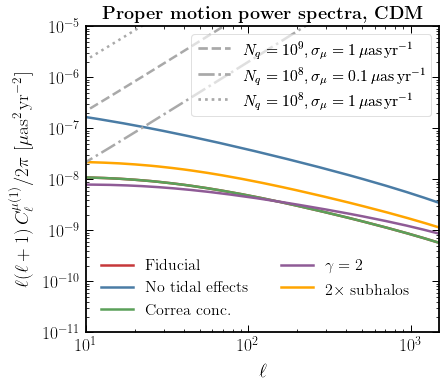

In [78]:
mpl.rcParams['figure.figsize'] = 6.3, 5.5

fig, ax = plt.subplots(1, 1)

c1 = ax.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*C_l_mu, label="Fiducial", alpha=alpha_plot, lw=lw_plot)
c2 = ax.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*C_l_mu_notidal, label="No tidal effects", alpha=alpha_plot, lw=lw_plot)
# c4, _ = plt.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*C_l_mu_SCP, label="Sanchez-Conde \& Prada concentration", alpha=alpha_plot, lw=lw_plot)
c5 = ax.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*C_l_mu, label="Correa conc.", alpha=alpha_plot, lw=lw_plot)
c3 = ax.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*C_l_mu_alpha2, label="$\\gamma=2$", alpha=alpha_plot, lw=lw_plot)
c6 = ax.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*C_l_mu_ncalib300, label=r"$2\times$ subhalos", alpha=alpha_plot, lw=lw_plot, color='orange')

sigma_mu = 1
N_q = 1e9

l1 = ax.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*np.ones_like(pspecpop.l_ary)*4*np.pi*sigma_mu**2/N_q, label="$N_q = 10^9, \sigma_\mu=1\,\mu$as\,yr$^{-1}$", alpha=alpha_plot, lw=lw_plot, color='darkgrey', ls='--')

sigma_mu = .1
N_q = 1e8

l2 = ax.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*np.ones_like(pspecpop.l_ary)*4*np.pi*sigma_mu**2/N_q, label="$N_q = 10^8, \sigma_\mu=0.1\,\mu$as\,yr$^{-1}$", alpha=alpha_plot, lw=lw_plot, color='darkgrey', ls='-.')

sigma_mu = 1
N_q = 1e8

l3 = ax.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*np.ones_like(pspecpop.l_ary)*4*np.pi*sigma_mu**2/N_q, label="$N_q = 10^8, \sigma_\mu=1\,\mu$as\,yr$^{-1}$", alpha=alpha_plot, lw=lw_plot, color='darkgrey', ls=':')

plt.yscale("log")
plt.xscale("log")

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)\,C_\ell^{\mu(1)}/2\pi$ [$\mu$as$^2$\,yr$^{-2}$]")

plt.xlim(10, 1500)
plt.ylim(1e-11,1e-5)

lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in range(5)], [lines[i].get_label() for i in range(5)], loc="lower left", fancybox=True, frameon=False, fontsize=16, ncol=2)
legend2 = plt.legend([lines[i] for i in range(5,8)], [lines[i].get_label() for i in range(5,8)], loc="upper right", fancybox=True, frameon=True, fontsize=16)
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.title('\\textbf{Proper motion power spectra, CDM}', fontsize=18)

plt.tight_layout()
# plt.savefig(plots_dir + "LCDMTheoryNoise.pdf", bbox_inches="tight")
# plt.savefig("/Users/smsharma/Dropbox/Projects/LensPowerSpectra/LensPower/Draft/PRD-v1/plots/LCDMTheoryNoise.pdf", bbox_inches="tight")

## Fig. 6: Fisher forecasts for discovery significance

In [79]:
# Test

sigma_mu = 1
sigma_alpha = .1
N_q = 1e8

fDM_base = 1
dfDM_base = 0.1

Cl_ary_fid = pspecpop.C_l_ary*fDM_base

p = pspecpop.C_l_ary*(fDM_base + dfDM_base)
m = pspecpop.C_l_ary*(fDM_base - dfDM_base)

fDM = Parameter('fDM', fDM_base ,dfDM_base ,None, True, p, m, 
                None, None, '$\\f_\mathrm{DM}$' )

parameters = [Cl_ary_fid, None, pspecpop.l_min, pspecpop.l_max, fDM]
observation = AstrometryObservation(fsky=1, sigma_mu=sigma_mu, sigma_alpha=None, N_q_mu=N_q, l_min_mu=10, l_max_mu=300, l_min_alpha=2, l_max_alpha=2000)

fshr = FisherForecast(parameters, observation)
lim = 1.64*np.sqrt(np.linalg.inv(fshr.fshr_cls + fshr.fshr_prior)[0,0])
print(lim)
baseline_sig = fDM_base/fshr.pars_vary[0].sigma
print(baseline_sig)

45.748299573739985
0.03584832693850281


### With tidal effects

In [80]:
sigma_mu_ary = np.logspace(-2,0,30)
N_q_ary = np.logspace(6,9,50)

In [81]:
sig_ary = np.zeros((len(sigma_mu_ary), len(N_q_ary)))
lim_ary = np.zeros((len(sigma_mu_ary), len(N_q_ary)))

for isigmu, sigmu in enumerate(tqdm_notebook(sigma_mu_ary)):
    for iNq, Nq in enumerate(N_q_ary):
        
        fDM_base = 1
        dfDM_base = 0.1

        Cl_ary_fid = C_l_mu*fDM_base

        p = C_l_mu*(fDM_base + dfDM_base)
        m = C_l_mu*(fDM_base - dfDM_base)

        fDM = Parameter('fDM', fDM_base ,dfDM_base ,None, True, p, m, 
                        None, None, '$\\f_\mathrm{DM}$' )

        parameters = [Cl_ary_fid, None, pspecpop.l_min, pspecpop.l_max, fDM]
        observation = AstrometryObservation(fsky=1, sigma_mu=sigmu, sigma_alpha=None, N_q_mu=Nq, l_min_mu=10, l_max_mu=500, l_min_alpha=2, l_max_alpha=2000)

        fshr = FisherForecast(parameters, observation)
        lim = 1.64*np.sqrt(np.linalg.inv(fshr.fshr_cls + fshr.fshr_prior)[0,0])
        sig_ary[isigmu, iNq] = fDM_base/fshr.pars_vary[0].sigma
        lim_ary[isigmu, iNq] = lim


/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


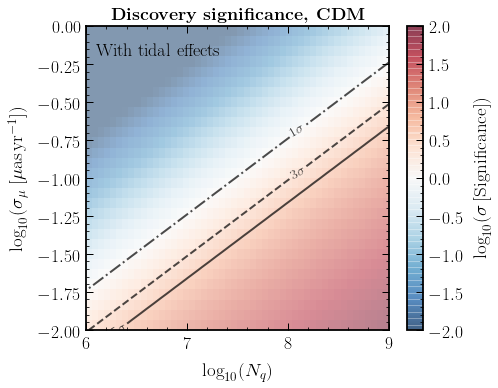

In [83]:
mpl.rcParams['figure.figsize'] = 7, 5.5

levels = [np.log10(1),np.log10(3),np.log10(5)]
X, Y = np.meshgrid(np.log10(N_q_ary), np.log10(sigma_mu_ary))

fig, ax = plt.subplots()

CS = ax.contour(X, Y, np.log10(sig_ary), levels = levels, linestyles=['-.','--','-'], colors='k', linewidths=2, alpha=0.7)

fmt = {}
strs = ['1$\sigma$', '3$\sigma$', '5$\sigma$']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
    
# im = ax.imshow(np.log10(sig_ary), cmap = palettable.cmocean.sequential.Ice_20_r.get_mpl_colormap(), aspect='auto', origin='lower', extent=[6,9,-2,0], vmin=np.log10(1), vmax=np.log10(1e3))
im = ax.imshow(np.log10(sig_ary), alpha=0.5, cmap='RdBu_r', aspect='auto', origin='lower', extent=[6,9,-2,0], vmin=np.log10(0.01), vmax=np.log10(1e2))

ax.clabel(CS, fmt=fmt,inline=1, fontsize=14)

ax.set_xlabel("$\log_{10}(N_q)$")
ax.set_ylabel("$\log_{10}(\sigma_\mu~[\mu$as\,yr$^{-1}$])")
ax.set_title('\\textbf{Discovery significance, CDM}', fontsize=18)

ax.text(6.1, -.2, "With tidal effects", fontsize=18)

cbar = fig.colorbar(im)
cbar.set_label('$\log_{10}(\sigma$\,[Significance])')

plt.tight_layout()
plt.savefig(plots_dir + "LCDM_disc.pdf")

### No tidal effects

In [15]:
sig_ary_notidal = np.zeros((len(sigma_mu_ary), len(N_q_ary)))
lim_ary_notidal = np.zeros((len(sigma_mu_ary), len(N_q_ary)))

for isigmu, sigmu in enumerate(tqdm_notebook(sigma_mu_ary)):
    for iNq, Nq in enumerate(N_q_ary):
        
        fDM_base = 1
        dfDM_base = 0.1

        Cl_ary_fid = C_l_mu*fDM_base

        p = C_l_mu_notidal*(fDM_base + dfDM_base)
        m = C_l_mu_notidal*(fDM_base - dfDM_base)

        fDM = Parameter('fDM', fDM_base ,dfDM_base ,None, True, p, m, 
                        None, None, '$\\f_\mathrm{DM}$' )

        parameters = [Cl_ary_fid, None, pspecpop.l_min, pspecpop.l_max, fDM]
        observation = AstrometryObservation(fsky=1, sigma_mu=sigmu, sigma_alpha=None, N_q_mu=Nq, l_min_mu=10, l_max_mu=500, l_min_alpha=2, l_max_alpha=2000)

        fshr = FisherForecast(parameters, observation)
        lim = 1.64*np.sqrt(np.linalg.inv(fshr.fshr_cls + fshr.fshr_prior)[0,0])
        sig_ary_notidal[isigmu, iNq] = fDM_base/fshr.pars_vary[0].sigma
        lim_ary_notidal[isigmu, iNq] = lim


/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


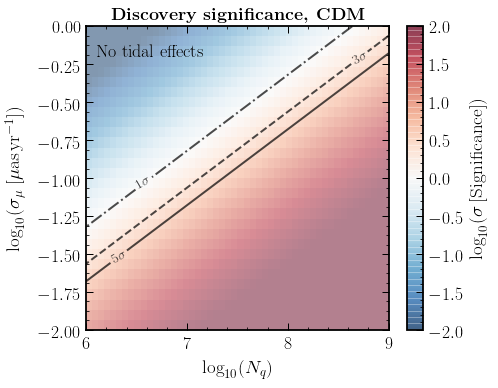

In [16]:
mpl.rcParams['figure.figsize'] = 7, 5.5

levels = [np.log10(1),np.log10(3),np.log10(5)]
levels_lim = [1.]

X, Y = np.meshgrid(np.log10(N_q_ary), np.log10(sigma_mu_ary))

fig, ax = plt.subplots()

CS = ax.contour(X, Y, np.log10(sig_ary_notidal), levels = levels, linestyles=['-.','--','-'], colors='k', linewidths=2, alpha=0.7)
# CS_lim = ax.contour(X, Y, lim_ary_notidal, levels = levels_lim, linestyles=['-'], colors='k', linewidths=2, alpha=0.7)

fmt = {}
fmt_lim = {}
strs = ['1$\sigma$', '3$\sigma$', '5$\sigma$']
strs_lim = ['$95\%$ limit']

for l, s in zip(CS.levels, strs):
    fmt[l] = s
    
# for l, s in zip(CS_lim.levels, strs_lim):
#     fmt_lim[l] = s

# im = ax.imshow(np.log10(sig_ary_notidal), cmap = palettable.cmocean.sequential.Ice_20_r.get_mpl_colormap(), aspect='auto', origin='lower', extent=[6,9,-2,0], vmin=np.log10(1), vmax=np.log10(1e3))
im = ax.imshow(np.log10(sig_ary_notidal), cmap='RdBu_r', alpha=0.5, aspect='auto', origin='lower', extent=[6,9,-2,0], vmin=np.log10(0.01), vmax=np.log10(1e2))

ax.clabel(CS, fmt=fmt,inline=1, fontsize=14)
# ax.clabel(CS_lim,inline=1, fontsize=14)

ax.set_xlabel("$\log_{10}(N_q)$")
ax.set_ylabel("$\log_{10}(\sigma_\mu~[\mu$as\,yr$^{-1}$])")
ax.set_title('\\textbf{Discovery significance, CDM}', fontsize=18)

ax.text(6.1, -0.2, "No tidal effects", fontsize=18)

cbar = fig.colorbar(im)
cbar.set_label('$\log_{10}(\sigma$\,[Significance])')

plt.tight_layout()
plt.savefig(plots_dir + "LCDM_disc_notidal.pdf")
